<a href="https://colab.research.google.com/github/BrokLori/broklori.github.io/blob/master/Cloropleth_of_Overall_Child_Opportunity_Index_by_Census_Tract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First "Map" of Buffalo

First step: Display a map of the Buffalo area. Areas of interest = Amherst (specifically Williamsville/Eggertsville/Snyder), Kenmore and Tonawanda. Add demographic data for these areas using census/ACS survey data (population, crime, diversity, school ratings etc.). 

**Desired outcome: User can select and/or rate preferred characteristics for a neighborhood, and based on that input, get some kind of visualization that demonstrates which neighborhoods would be the best fit.**

In [0]:
# Install libraries
!pip install geopandas
!pip install descartes

In [0]:
# Import libraries
# %matplotlib inline sets backend of matplotlib to 'inline' backend
# Output displayed below the cell
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes as dc

In [0]:
# Import gspread for Google Colab
!pip install --upgrade -q gspread

In [0]:
# Upload shapefiles from computer using files > upload tool

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving tl_2018_36_tract.cpg to tl_2018_36_tract.cpg
Saving tl_2018_36_tract.dbf to tl_2018_36_tract.dbf
Saving tl_2018_36_tract.prj to tl_2018_36_tract.prj
Saving tl_2018_36_tract.shp to tl_2018_36_tract.shp
Saving tl_2018_36_tract.shp.ea.iso.xml to tl_2018_36_tract.shp.ea.iso.xml
Saving tl_2018_36_tract.shp.iso.xml to tl_2018_36_tract.shp.iso.xml
Saving tl_2018_36_tract.shx to tl_2018_36_tract.shx
User uploaded file "tl_2018_36_tract.cpg" with length 5 bytes
User uploaded file "tl_2018_36_tract.dbf" with length 526644 bytes
User uploaded file "tl_2018_36_tract.prj" with length 165 bytes
User uploaded file "tl_2018_36_tract.shp" with length 12674120 bytes
User uploaded file "tl_2018_36_tract.shp.ea.iso.xml" with length 22142 bytes
User uploaded file "tl_2018_36_tract.shp.iso.xml" with length 39728 bytes
User uploaded file "tl_2018_36_tract.shx" with length 39444 bytes


In [0]:
# Set filepath and load in a shapefile (Jupyter Notebook only)
# To get filepath, drag and drop in terminal (Jupyter Notebook only)

# Read in shapefile

fp = "tl_2018_36_tract.shp"
map_df = gpd.read_file(fp)

In [0]:
# Check data type
# This is not a normal dataframe, but a GEOdataframe
map_df.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,007,012702,36007012702,127.02,Census Tract 127.02,G5020,S,65411230,228281,+42.0350532,-075.9055509,"POLYGON ((-75.959172 42.008516, -75.959138 42...."
1,36,007,012800,36007012800,128,Census Tract 128,G5020,S,12342855,259439,+42.1305335,-075.9181575,"POLYGON ((-75.94766 42.137271, -75.944531 42.1..."
2,36,007,012900,36007012900,129,Census Tract 129,G5020,S,14480253,63649,+42.1522758,-075.9766029,"POLYGON ((-76.022294 42.156988, -76.019165 42...."
3,36,007,013000,36007013000,130,Census Tract 130,G5020,S,9934434,381729,+42.1236499,-076.0002197,"POLYGON ((-76.024168 42.125898, -76.02409 42.1..."
4,36,007,013202,36007013202,132.02,Census Tract 132.02,G5020,S,2451349,3681,+42.1238924,-076.0311921,"POLYGON ((-76.039964 42.132845, -76.0386219999..."


In [0]:
# Filter COUNTYFP to only include Erie County (FIPS code 029)
map_df = map_df[map_df['COUNTYFP']=='029']

# Choose only columns that I want
map_df = map_df[['GEOID', 'geometry']]

# If you want to rename columns use the following commented code
# Map_df = map_df.rename(index=str, columns={"NAMELSAD": "Census Tract",
                                           #"geometry": "geometry"})
map_df.head()

,GEOID,geometry
75,36029010902,"POLYGON ((-78.787234 42.87169, -78.78680399999..."
118,36029000500,"POLYGON ((-78.89456 42.87841, -78.890992 42.87..."
119,36029000700,"POLYGON ((-78.815023 42.84116, -78.815006 42.8..."
120,36029000900,"POLYGON ((-78.82361999999999 42.856309, -78.82..."
121,36029001000,POLYGON ((-78.81685299999999 42.85725499999999...


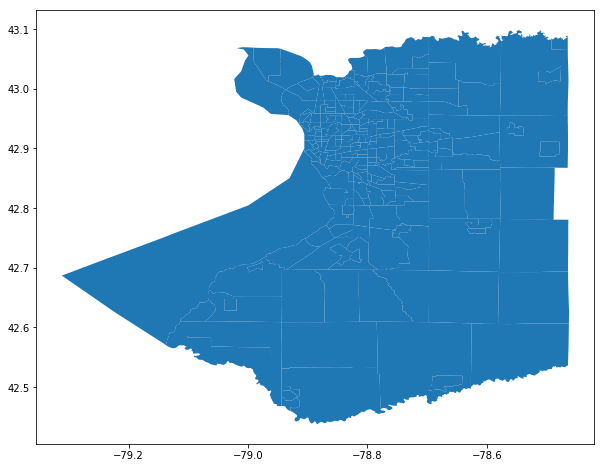

In [0]:
# Preview map with no data in it
map_df.plot(figsize=(10,10))

In [0]:
# Import data from google sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('Buffalo_Child_Opportunity').sheet1

# Get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
df = pd.DataFrame.from_records(rows)
df.head()

[['FIPS', 'MSAID', 'MSANAME', 'ST', 'ALLCOMPLEV', 'EDCOMPLEV', 'HECOMPLEV', 'NBCOMPLEV', 'ALLCOMP', 'EDCOMP', 'HECOMP', 'NBCOMP', 'ED1Z', 'ED2Z', 'ED3Z', 'ED4Z', 'ED5Z', 'ED6Z', 'ED7Z', 'ED8Z', 'HE3Z', 'HE4Z', 'HE5Z', 'HE6Z', 'HE7Z', 'HE8Z', 'NB1Z', 'NB2Z', 'NB3Z', 'NB4Z', 'NB5Z', 'OL1', 'OL2', 'OL3', 'OL4', 'OL5', 'OL6', 'OL7'], ['36063024002', '15380', 'Buffalo-Niagara Falls, NY Metropolitan Statistical Area', 'NY', 'Very Low', 'Low', 'Very Low', 'Very Low', '-0.671924', '-0.390404', '-1.220617', '-0.404752', '-0.53527', '0.66565', '-0.48902', '-0.41832', '-1.15989', '0.63528', '-0.45204', '-1.36962', '-0.86113', '-0.85626', '0.18211', '-4.17103', '-0.39965', '-1.21774', '-1.35843', '0.2722', '0.09022', '0.26767', '-1.29542', '499', '28', '445', '1', '6', '0', '19'], ['36063024101', '15380', 'Buffalo-Niagara Falls, NY Metropolitan Statistical Area', 'NY', 'Low', 'Moderate', 'Moderate', 'Very Low', '-0.209633', '-0.108246', '0.007287', '-0.52794', '-0.98651', '0.05594', '0.32416', '0.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,FIPS,MSAID,MSANAME,ST,ALLCOMPLEV,EDCOMPLEV,HECOMPLEV,NBCOMPLEV,ALLCOMP,EDCOMP,HECOMP,NBCOMP,ED1Z,ED2Z,ED3Z,ED4Z,ED5Z,ED6Z,ED7Z,ED8Z,HE3Z,HE4Z,HE5Z,HE6Z,HE7Z,HE8Z,NB1Z,NB2Z,NB3Z,NB4Z,NB5Z,OL1,OL2,OL3,OL4,OL5,OL6,OL7
1,36063024002,15380,"Buffalo-Niagara Falls, NY Metropolitan Statist...",NY,Very Low,Low,Very Low,Very Low,-0.671924,-0.390404,-1.220617,-0.404752,-0.53527,0.66565,-0.48902,-0.41832,-1.15989,0.63528,-0.45204,-1.36962,-0.86113,-0.85626,0.18211,-4.17103,-0.39965,-1.21774,-1.35843,0.2722,0.09022,0.26767,-1.29542,499,28,445,1,6,0,19
2,36063024101,15380,"Buffalo-Niagara Falls, NY Metropolitan Statist...",NY,Low,Moderate,Moderate,Very Low,-0.209633,-0.108246,0.007287,-0.52794,-0.98651,0.05594,0.32416,0.96586,-0.06597,0.66221,-0.45204,-1.36962,-0.86113,1.82846,0.17694,-0.49935,0.58101,-1.18221,-1.57428,0.10485,0.01319,0.12789,-1.31135,948,29,892,2,9,2,14
3,36063024102,15380,"Buffalo-Niagara Falls, NY Metropolitan Statist...",NY,Very Low,Moderate,Very Low,Very Low,-0.767146,-0.052771,-1.83875,-0.409916,-0.58572,0.05594,0.32416,0.96586,-0.43606,0.66221,-0.45204,-0.95652,-0.86113,0.24013,-9.25111,0.66417,-0.5713,-1.25326,-0.82567,-0.01642,0.12699,-0.01182,-1.32266,689,35,622,7,6,4,15
4,36063024201,15380,"Buffalo-Niagara Falls, NY Metropolitan Statist...",NY,High,High,Very High,Low,0.256259,0.527608,0.402168,-0.161,-0.35398,0.43561,0.48828,0.57926,1.25471,0.99204,1.36835,-0.54341,0.81529,1.6917,0.18473,0.31107,0.52138,-1.11116,-0.40062,0.25821,0.12606,0.46162,-1.25027,1582,32,1472,11,5,6,56


In [0]:
# Remove the first row/header
# Create a new variable called 'new_header' from first row of dataset
new_header = df.iloc[0] 

# Slice the rest of your data, minus header row
df = df[1:] 

# Set the header row as the df header
df.columns = new_header

# Preview the 5 first rows of the new dataset
df.head()

,FIPS,MSAID,MSANAME,ST,ALLCOMPLEV,EDCOMPLEV,HECOMPLEV,NBCOMPLEV,ALLCOMP,EDCOMP,HECOMP,NBCOMP,ED1Z,ED2Z,ED3Z,ED4Z,ED5Z,ED6Z,ED7Z,ED8Z,HE3Z,HE4Z,HE5Z,HE6Z,HE7Z,HE8Z,NB1Z,NB2Z,NB3Z,NB4Z,NB5Z,OL1,OL2,OL3,OL4,OL5,OL6,OL7
1,36063024002,15380,"Buffalo-Niagara Falls, NY Metropolitan Statist...",NY,Very Low,Low,Very Low,Very Low,-0.671924,-0.390404,-1.220617,-0.404752,-0.53527,0.66565,-0.48902,-0.41832,-1.15989,0.63528,-0.45204,-1.36962,-0.86113,-0.85626,0.18211,-4.17103,-0.39965,-1.21774,-1.35843,0.2722,0.09022,0.26767,-1.29542,499,28,445,1,6,0,19
2,36063024101,15380,"Buffalo-Niagara Falls, NY Metropolitan Statist...",NY,Low,Moderate,Moderate,Very Low,-0.209633,-0.108246,0.007287,-0.52794,-0.98651,0.05594,0.32416,0.96586,-0.06597,0.66221,-0.45204,-1.36962,-0.86113,1.82846,0.17694,-0.49935,0.58101,-1.18221,-1.57428,0.10485,0.01319,0.12789,-1.31135,948,29,892,2,9,2,14
3,36063024102,15380,"Buffalo-Niagara Falls, NY Metropolitan Statist...",NY,Very Low,Moderate,Very Low,Very Low,-0.767146,-0.052771,-1.83875,-0.409916,-0.58572,0.05594,0.32416,0.96586,-0.43606,0.66221,-0.45204,-0.95652,-0.86113,0.24013,-9.25111,0.66417,-0.5713,-1.25326,-0.82567,-0.01642,0.12699,-0.01182,-1.32266,689,35,622,7,6,4,15
4,36063024201,15380,"Buffalo-Niagara Falls, NY Metropolitan Statist...",NY,High,High,Very High,Low,0.256259,0.527608,0.402168,-0.161,-0.35398,0.43561,0.48828,0.57926,1.25471,0.99204,1.36835,-0.54341,0.81529,1.6917,0.18473,0.31107,0.52138,-1.11116,-0.40062,0.25821,0.12606,0.46162,-1.25027,1582,32,1472,11,5,6,56
5,36063024202,15380,"Buffalo-Niagara Falls, NY Metropolitan Statist...",NY,Moderate,High,High,Low,0.056401,0.186489,0.235373,-0.252658,-0.21797,0.59533,0.48828,0.57926,-0.36268,0.99204,-0.45204,-0.13031,1.23439,2.50785,0.18473,-0.21302,-1.17279,-1.12892,-0.78904,0.74323,0.19726,-0.10933,-1.30541,611,36,549,7,2,5,12


In [0]:
# Select the columns that we want for the map
score = df[['FIPS', 'ALLCOMP']]

# Check dataframe
score.head()

,FIPS,ALLCOMP
1,36063024002,-0.671924
2,36063024101,-0.209633
3,36063024102,-0.767146
4,36063024201,0.256259
5,36063024202,0.056401


In [0]:
# Rename columns to something simpler, if needed
# Make sure that merged columns match/not necessary if merging using GEOID
# Remove ', Erie County, New York' and replace with empty string
#score = df.replace(r'\, Erie County, New York.*', '', regex=True)
#score = score.rename(index=str, columns={"GEO.display-label": "Geo Label",
                                      #"HD01_VD01": "Estimate; Total"})

#score.head()

In [0]:
# Join the geodataframe with the cleaned up csv dataframe
# 'Outer' join to include values for Estimate;Total
merged = map_df.set_index('GEOID').join(score.set_index('FIPS'), how='outer')

# NaN values are taken as floats. If needed, fill with empty strings ''
#merged = merged.fillna('')
merged.head()

,geometry,ALLCOMP
36029000110,"POLYGON ((-78.875383 42.85092299999999, -78.87...",-0.379895
36029000200,"POLYGON ((-78.83503999999999 42.859019, -78.83...",-0.284052
36029000500,"POLYGON ((-78.89456 42.87841, -78.890992 42.87...",-0.192098
36029000600,"POLYGON ((-78.823887 42.832907, -78.823865 42....",-0.113948
36029000700,"POLYGON ((-78.815023 42.84116, -78.815006 42.8...",0.174259


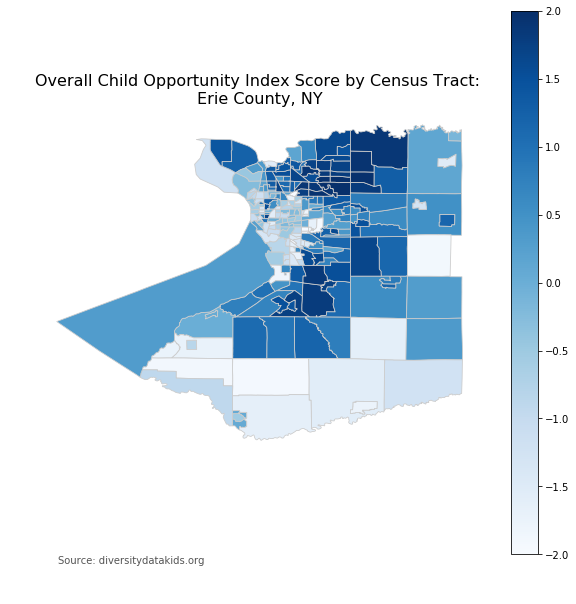

In [0]:
# Set a variable that will call the column we want to visualise on the map
variable = 'ALLCOMP'

# Set the range for the choropleth
vmin, vmax = -2,2

# Create figure and axes for Matplotlib
# Missing ) from source code
fig, ax = plt.subplots(1, figsize=(10, 10))

# Create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Customize and add annotations

# Remove the axis
ax.axis('off')

# Add a title
ax.set_title('Overall Child Opportunity Index Score by Census Tract: \nErie County, NY', \
              fontdict={'fontsize': '16',
                        'fontweight' : '3'})

# Create an annotation for the  data source
ax.annotate('Source: diversitydatakids.org',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# This will save the figure as a high-res png. you can also save as svg
fig.savefig('Overall Child Opportunity Index.png', dpi=300)